#### Importing and preprocessing the data

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester
from pandas import read_csv 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import matplotlib.pyplot as plt

data = pd.read_csv('hairdryer.csv')
indexes = ['Voltage', 'Temperature']
data.columns = indexes
indexes = indexes[:-1]

In [31]:
data.head()

,Voltage,Temperature
0,3.41,4.7637
1,6.41,4.8394
2,6.41,5.0030
3,6.41,5.0176
4,6.41,5.0567


In [32]:
data.describe()

,Voltage,Temperature
count,999.000000,999.000000
mean,4.998589,4.890219
std,1.498132,0.830213
min,3.410000,3.200800
25%,3.410000,4.204450
50%,6.410000,4.941900
75%,6.410000,5.652500
max,6.410000,6.250800


In [33]:
data.dtypes == float

Voltage        True
Temperature    True
dtype: bool

In [34]:
data.isnull().sum()

Voltage        0
Temperature    0
dtype: int64

In [35]:
data_x = data.drop('Temperature', axis = 1)
data_y = data.Temperature

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=21)

In [36]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.array
y_test = y_test.array

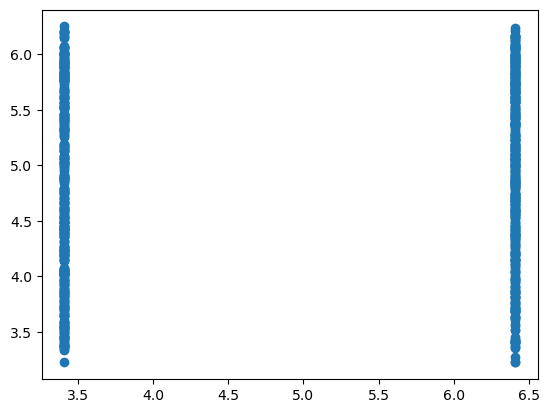

In [39]:
plt.scatter(x_train, y_train)
plt.show()

#### Building the model

In [38]:
cl = Clusterer(x_train=x_train, y_train=y_train, nr_clus=4)
clust_centers, part_matrix, _ = cl.cluster(method='fcm')

# %% Estimate membership functions parameters
ae = AntecedentEstimator(x_train, part_matrix)
antecedent_params = ae.determineMF()

# %% Estimate consequent parameters
ce = ConsequentEstimator(x_train, y_train, part_matrix)
conseq_params = ce.suglms()

# %% Build first-order Takagi-Sugeno model
modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, indexes, save_simpful_code=False)
model = modbuilder.get_model()

# %% Get model predictions
modtester = SugenoFISTester(model, x_test, indexes)
y_pred = modtester.predict()[0]

# %% Compute regression metrics
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.3f}".format(mse))
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error: {:.1f}%".format(mape*100))
exp_var = explained_variance_score(y_test, y_pred)
print("Explained Variance Score: {:.3f}".format(exp_var))

 * Detected 4 rules / clusters
 * Detected Sugeno model type
Mean Squared Error: 0.754
Mean Absolute Percentage Error: 16.2%
Explained Variance Score: 0.022
